## Transformaciones de los datos

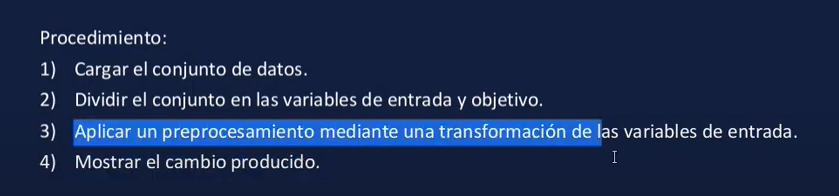

In [1]:
from IPython.display import Image
Image(filename='img/prepro.PNG') 

## Datos categoricos

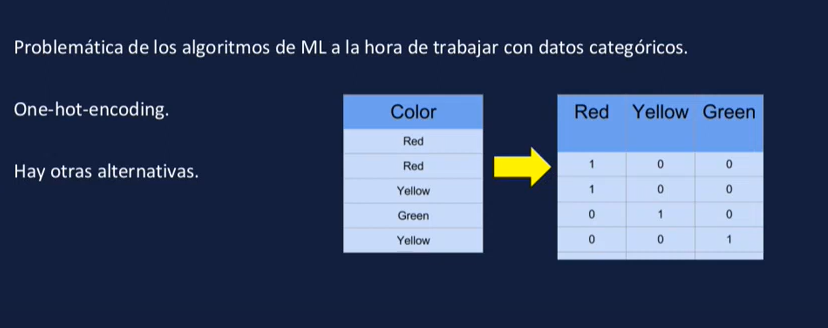

In [2]:
from IPython.display import Image
Image(filename='img/datos_cat.PNG') 

Los tenemos que pasar de categoricos a numericos

**NO** puedo asignarle un numero a cada color porque estaria introduciendo una distacia ficticia

Estaria introduciedo una informacion que no existe dentro del conjunto de datos


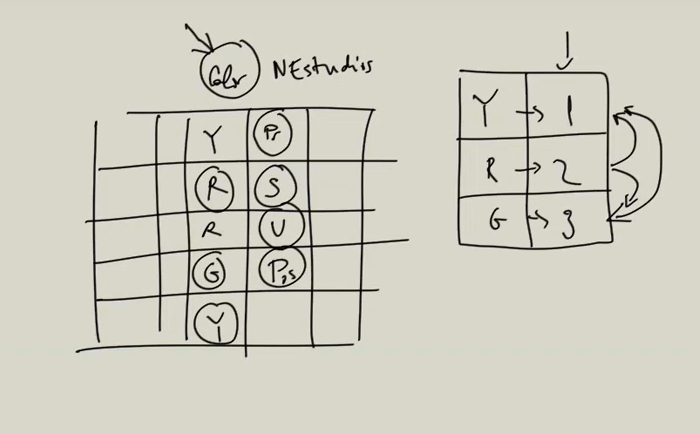

In [3]:
from IPython.display import Image
Image(filename='img/dist.PNG') 

Lo tenemos que pasar a **Binario**

Entonces la variable se tranforma en tres nuevas binarias

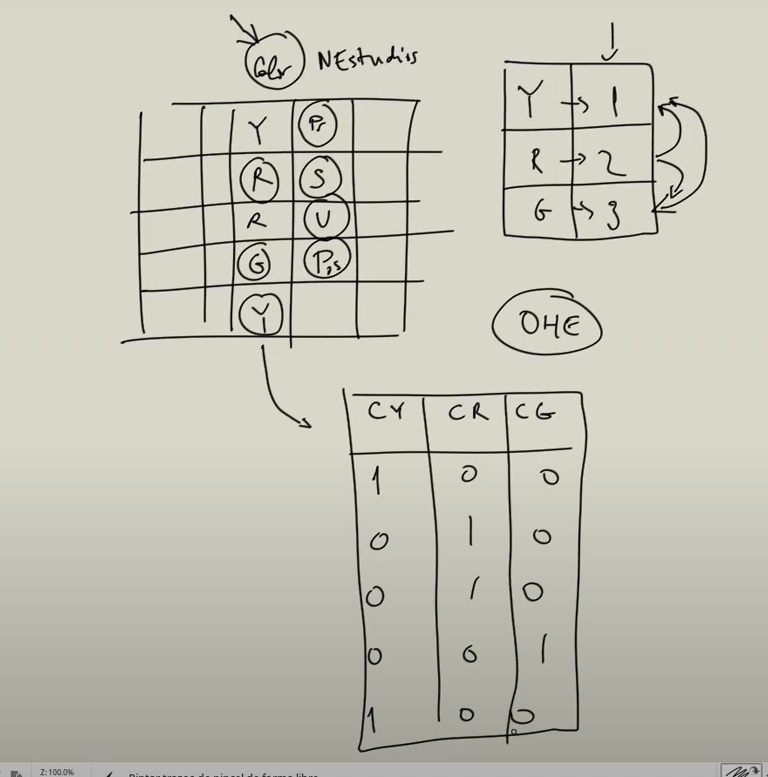

In [4]:
from IPython.display import Image
Image(filename='img/binari.PNG') 

NO utilizar **get.dummies()**

### OneHotENcoder

Tengo un problema de clasificacion binaria con este dataset

Lo primero que hago es 

In [4]:
from pandas import read_csv 
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd

from pandas import read_csv
import random, time, numpy

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm 


In [5]:
filename = 'indian_liver_patient.csv'  
data = read_csv(filename) 

data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
class_distribution = data.groupby('Dataset').size()
print(class_distribution)

Dataset
1    416
2    167
dtype: int64


In [6]:
input_data = data[data.columns[:-1]]
input_data= input_data.fillna(0)

### Primero

Divido los datos entre los inputs y el output

In [7]:
X = input_data

# Scaler ya detecta la variable y sabe que es un problema de clasificacion
# Nunca se transforma la variable de salida
Y = data['Dataset']

### Segundo

Divido con la funcion **train_test_split**

Le paso todo el conjunto de datos

Ento me divide en 70% para entrenamiento y 30% para test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed)

### Variables de tipo numerico

Dentro del conjunto de entrenamiento selecciono las variables que sean de tipo numerico

No van a necesitar ningun atransformacion con ONE HOT ENCODER

In [9]:
num_X_train = X_train.select_dtypes(include=['int','float'])
num_X_test = X_test.select_dtypes(include=['int','float'])

### Standar Scaler

In [10]:
stdScaler = StandardScaler()
stdScaler.fit(num_X_train)

StandardScaler()

Variables categoricas que he generado con el conjunto de entrenamiento.

In [1]:
resc_X_train = pd.DataFrame(stdScaler.transform(num_X_train),columns=num_X_train.columns)
resc_X_test = pd.DataFrame(stdScaler.transform(num_X_test),columns=num_X_test.columns)

NameError: name 'pd' is not defined

### Variables de tipo categorico

La funcion **.select_dtypes()** devuelve un dataframe

In [ ]:
cat_X_train = X_train.select_dtypes(include=['object'])
cat_X_test = X_test.select_dtypes(include=['object'])

### Instancio la clase ONEHOT ENCODER

Genero un objeto para trabajar con el 

In [ ]:
ohe = OneHotEncoder(drop = 'if_binary')

Ahora entreno y genero un **modelo de transformacion** con OneHot Encoder

Va a mirar en las variables catagoricas cuantas etiquetas diferentes hay, y se las va a guardar

Para cada etiqueta generar una transformacion

El modelo ha sido creado solomente con los datos de **entrenamiento**

In [ ]:

ohe.fit(cat_X_train)


### Finalmente

Ahora transformo esas variabels categoricas del conjunto de entrenamiento con el **objeto** que he creado, y que ya previmente he entrenado

De esta manera genero un modelo de transformacion

Es decir un nuevo dataframe con los datos ya trasformados

Aplico la misma transfomracion sobre los datos de test

In [ ]:
resc_X_train[ohe.get_feature_names_out()] = ohe.transform(cat_X_train).toarray()
resc_X_test[ohe.get_feature_names_out()] = ohe.transform(cat_X_test).toarray()

In [14]:
resc_X_train.shape

(408, 9)

_____________________________________________

## Distancia

La mayoria de los metodos predictivos se basan en la distancia

Es importanci saber la distribucion de los datos

Utilizamos especialmente la distancia **Euclidea**

Si existen distancia muy grandes entre las variables causa problema 

Para ello reescalamos los datos para segurarnos de que todas las variables se encuentren dentro de un mismo rango de datos

**NO** queremos asignarle mas poder predictivo a las variables que tiene sun rango mas grande

rango = MAX - MIN

In [ ]:
from IPython.display import Image
Image(filename='img/distancia.PNG') 

### Re escalaado de datos

Veremos tres maneras diferentes



### MIN MAX SCALER

In [ ]:
from pandas import read_csv
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [3]:
data = read_csv('indian_liver_patient.csv') 
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
input_data = data[data.columns[:-1]]
input_data = pd.get_dummies(input_data, prefix=['Gender'])
input_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [5]:
X = input_data
Y = data['Dataset']

### MinMaxScaler()

Esto es para que los datos se mantengan entre 0, 1, pero permite que con **feature_range()** utilizar otros datos

In [6]:
# Definimos un objeto de la clase mimaxscaler
minmaxSc = MinMaxScaler(feature_range=(0,1))

# Y alimentamos con los t¡datos de entrenamiento para genenrar la transformacion lieneal
minmaxSc.fit(X)

# Utilizamo el metodo TRAMNSFORM sobre los datos de entrada
# Se genera un nuevo dataframe que contienen las variables reescaladas
rescX = minmaxSc.transform(X)


NameError: name 'MinMaxScaler' is not defined

In [7]:
resc_X_train = pandas.DataFrame(stdScaler.transform(num_X_train),columns=num_X_train.columns)
resc_X_test = pandas.DataFrame(stdScaler.transform(num_X_test),columns=num_X_test.columns)

NameError: name 'pandas' is not defined